<a href="https://colab.research.google.com/github/ladata-ufs/Cafezinho-G3/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Conhecendo o DataSet

In [2]:
# Remover o '/content' quando finalizar o projeto
consumo_domestico = pd.read_csv('./data/Coffee_domestic_consumption.csv')
exportacao = pd.read_csv('./data/Coffee_export.csv')
inventorio_cafe_verde = pd.read_csv('./data/Coffee_green_coffee_inventorie.csv')
importacao = pd.read_csv('./data/Coffee_import.csv')
consumo_importadores = pd.read_csv('./data/Coffee_importers_consumption.csv')
producao = pd.read_csv('./data/Coffee_production.csv')
re_exportacao = pd.read_csv('./data/Coffee_re_export.csv')

## Pergunta:
Há relação entre um país produtor e um país consumidor de café?

### Análise dos DataFrames

#### Consumidores

In [3]:
consumo_domestico.head()

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000


In [4]:
consumo_domestico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     55 non-null     object
 1   Coffee type                 55 non-null     object
 2   1990/91                     55 non-null     int64 
 3   1991/92                     55 non-null     int64 
 4   1992/93                     55 non-null     int64 
 5   1993/94                     55 non-null     int64 
 6   1994/95                     55 non-null     int64 
 7   1995/96                     55 non-null     int64 
 8   1996/97                     55 non-null     int64 
 9   1997/98                     55 non-null     int64 
 10  1998/99                     55 non-null     int64 
 11  1999/00                     55 non-null     int64 
 12  2000/01                     55 non-null     int64 
 13  2001/02                     55 non-null     int64 
 

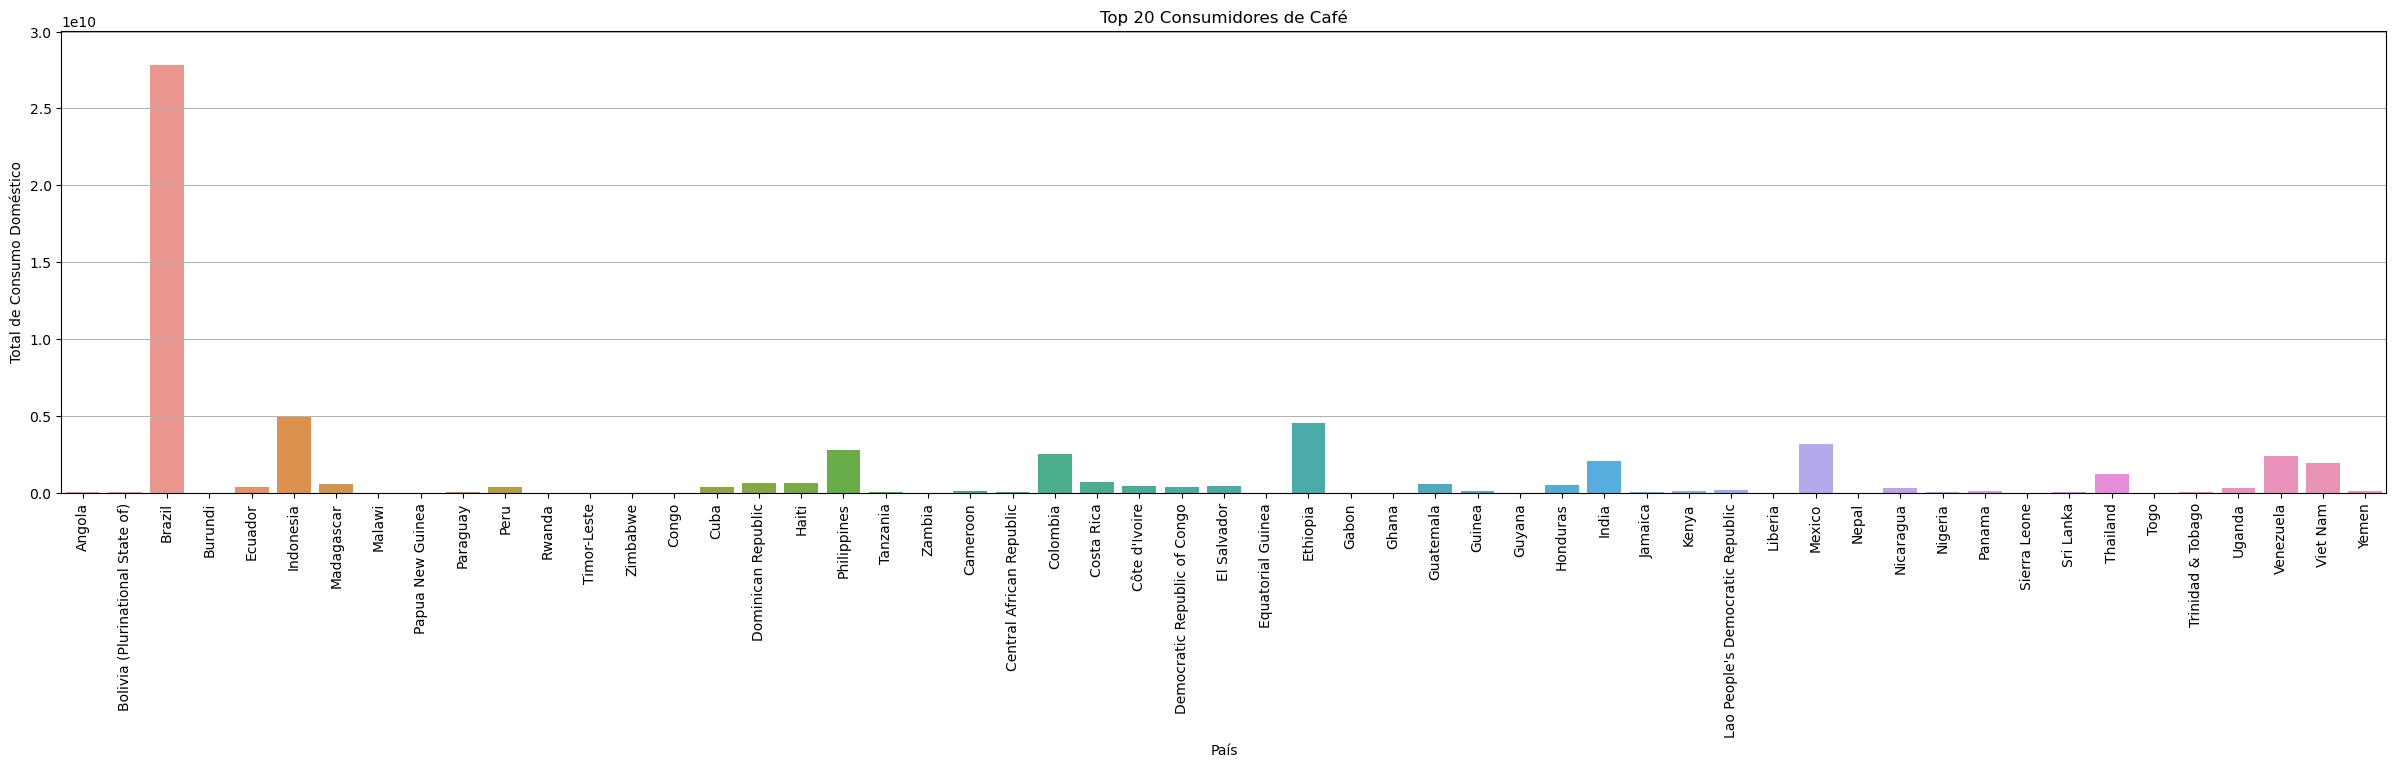

In [5]:
# Barplot
plt.figure(figsize=(30, 6))
sns.barplot(x='Country', y='Total_domestic_consumption', data=consumo_domestico)
plt.xticks(rotation=90)
plt.title('Coffee Consumption by Country')
plt.grid(True, which='both', axis='y', linestyle='-', linewidth=0.7)
plt.title('Top 20 Consumidores de Café')
plt.ylabel('Total de Consumo Doméstico')
plt.xlabel('País')


# Ajustar os limites do eixo y
max_value = consumo_domestico['Total_domestic_consumption'].max()
plt.ylim(0, max_value * 1.08)  # Aumenta o limite superior do eixo y em 8%

plt.show()

Os 20 maiores consumidores de café (sem repetição de países):
0                 Brazil
1              Indonesia
2               Ethiopia
3                 Mexico
4            Philippines
5               Colombia
6              Venezuela
7                  India
8               Viet Nam
9               Thailand
10            Costa Rica
11    Dominican Republic
12                 Haiti
13             Guatemala
14            Madagascar
15              Honduras
16           El Salvador
17         Côte d'Ivoire
18                  Peru
19                  Cuba
Name: Country, dtype: object


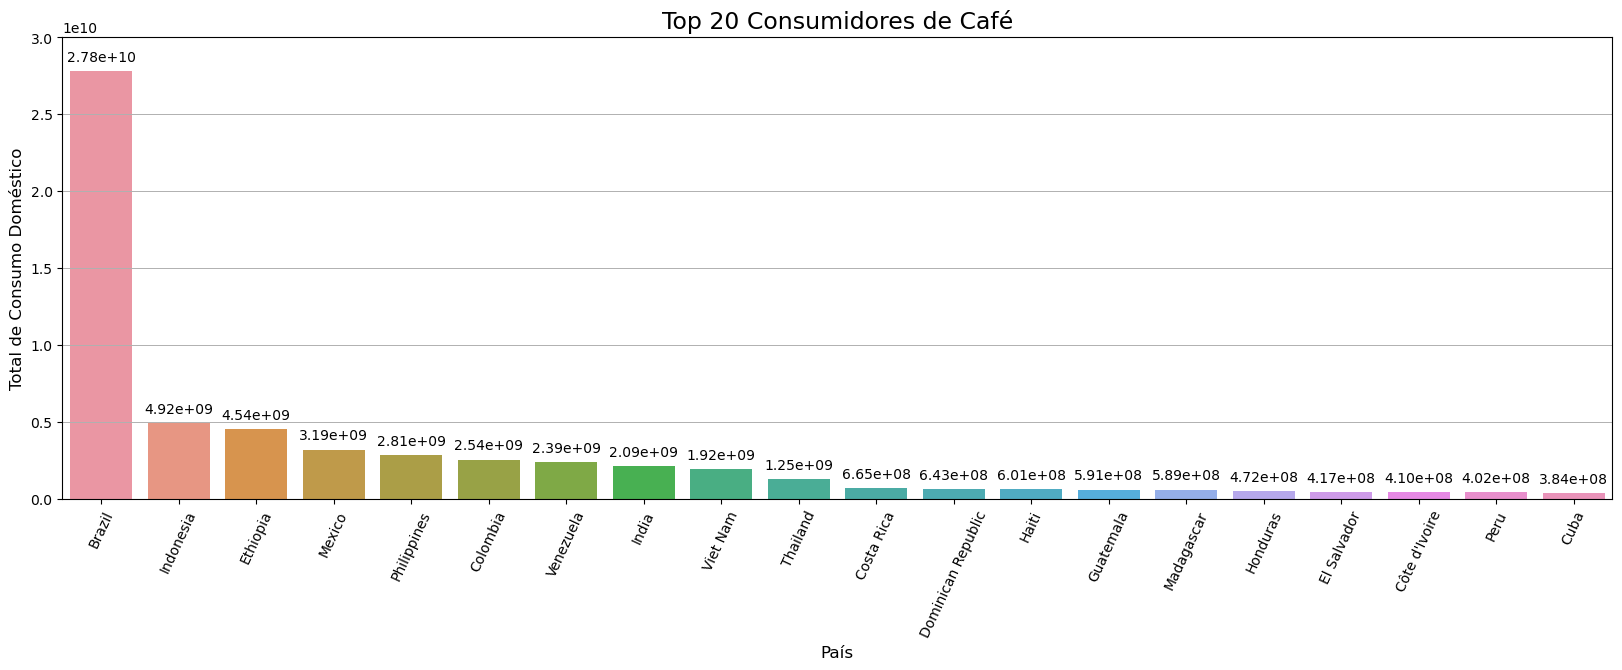

In [47]:
# mesmo gráfico somente com os maiores produtores
# Ordenar o DataFrame pelo valor da produção em ordem decrescente
df_sorted = consumo_domestico.sort_values('Total_domestic_consumption', ascending=False)

# Selecionar os dados dos 20 maiores produtores e evitar a repetição de países
top_20_consumidores = df_sorted['Country'].drop_duplicates().head(20)

# Mostrar os 20 maiores produtores
print("Os 20 maiores consumidores de café (sem repetição de países):")
print(top_20_consumidores.reset_index(drop=True))

# Criar o barplot usando seaborn
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=top_20_consumidores, y='Total_domestic_consumption', data=consumo_domestico)
plt.xticks(rotation=65)
plt.grid(True, which='both', axis='y', linestyle='-', linewidth=0.7)
plt.title('Top 20 Consumidores de Café', fontsize=17)
plt.ylabel('Total de Consumo Doméstico', fontsize=12)
plt.xlabel('País', fontsize=12)


# Ajustar os limites do eixo y
max_value = consumo_domestico['Total_domestic_consumption'].max()
plt.ylim(0, max_value * 1.08)  # Aumenta o limite superior do eixo y em 8%

# Adicionar os valores no topo das barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2e'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()


#### Produtores

In [7]:
producao.head()

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production
0,Angola,Robusta/Arabica,3.000000e+06,4.740000e+06,4.680000e+06,1.980000e+06,4.620000e+06,3.720000e+06,4.260000e+06,3.840000e+06,...,1.740000e+06,1.980000e+06,2.100000e+06,2.340000e+06,2.460000e+06,2.700000e+06,2.100000e+06,2.520000e+06,3.120000e+06,8.208000e+07
1,Bolivia (Plurinational State of),Arabica,7.380000e+06,6.240000e+06,7.200000e+06,3.060000e+06,7.020000e+06,8.520000e+06,7.500000e+06,8.460000e+06,...,7.920000e+06,6.300000e+06,7.200000e+06,6.000000e+06,5.040000e+06,4.680000e+06,5.040000e+06,4.980000e+06,4.860000e+06,2.070000e+08
2,Brazil,Arabica/Robusta,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,...,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09,7.508298e+10
3,Burundi,Arabica/Robusta,2.922000e+07,4.002000e+07,3.720000e+07,2.358000e+07,3.984000e+07,2.604000e+07,2.406000e+07,1.500000e+07,...,1.224000e+07,2.436000e+07,9.780000e+06,1.488000e+07,1.614000e+07,1.176000e+07,1.212000e+07,1.224000e+07,1.632000e+07,6.236400e+08
4,Ecuador,Arabica/Robusta,9.024000e+07,1.274400e+08,7.110000e+07,1.241400e+08,1.425600e+08,1.132800e+08,1.195800e+08,7.146000e+07,...,4.950000e+07,4.968000e+07,3.996000e+07,3.864000e+07,3.864000e+07,3.870000e+07,3.744000e+07,2.976000e+07,3.354000e+07,1.900380e+09


In [8]:
producao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           55 non-null     object 
 1   Coffee type       55 non-null     object 
 2   1990/91           55 non-null     float64
 3   1991/92           55 non-null     float64
 4   1992/93           55 non-null     float64
 5   1993/94           55 non-null     float64
 6   1994/95           55 non-null     float64
 7   1995/96           55 non-null     float64
 8   1996/97           55 non-null     float64
 9   1997/98           55 non-null     float64
 10  1998/99           55 non-null     float64
 11  1999/00           55 non-null     float64
 12  2000/01           55 non-null     float64
 13  2001/02           55 non-null     float64
 14  2002/03           55 non-null     float64
 15  2003/04           55 non-null     float64
 16  2004/05           55 non-null     float64
 17 

In [9]:
producao.describe()

,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,1999/00,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production
count,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,...,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01
mean,1.017055e+08,1.104753e+08,1.074775e+08,1.001007e+08,1.017971e+08,9.525927e+07,1.127029e+08,1.089676e+08,1.187629e+08,1.433280e+08,...,1.541749e+08,1.649280e+08,1.679007e+08,1.639625e+08,1.703193e+08,1.770742e+08,1.785742e+08,1.881415e+08,1.800578e+08,4.104269e+09
std,2.510875e+08,2.668466e+08,3.022180e+08,2.489344e+08,2.510328e+08,1.858680e+08,2.602192e+08,2.430145e+08,3.142337e+08,4.012591e+08,...,4.469919e+08,4.931417e+08,5.030529e+08,4.918727e+08,5.059698e+08,5.225472e+08,5.135587e+08,5.851111e+08,5.390922e+08,1.112550e+10
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.080000e+06
25%,2.430000e+06,3.900000e+06,2.640000e+06,2.130000e+06,2.610000e+06,2.610000e+06,2.340000e+06,2.880000e+06,3.480000e+06,3.540000e+06,...,1.980000e+06,1.710000e+06,2.010000e+06,2.250000e+06,2.310000e+06,1.890000e+06,2.160000e+06,2.190000e+06,2.280000e+06,8.199000e+07
50%,2.766000e+07,2.778000e+07,3.000000e+07,2.652000e+07,2.436000e+07,2.604000e+07,2.406000e+07,1.800000e+07,2.634000e+07,2.184000e+07,...,2.094000e+07,2.004000e+07,1.548000e+07,1.488000e+07,1.758000e+07,1.620000e+07,1.584000e+07,1.860000e+07,1.842000e+07,6.236400e+08
75%,9.216000e+07,9.720000e+07,9.234000e+07,9.486000e+07,1.153200e+08,1.127700e+08,1.139700e+08,9.669000e+07,1.076700e+08,1.211700e+08,...,9.735000e+07,9.189000e+07,7.185000e+07,6.960000e+07,6.657000e+07,6.864000e+07,7.053000e+07,7.806000e+07,7.194000e+07,2.785140e+09
max,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,2.205660e+09,2.854680e+09,...,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09,7.508298e+10


Text(0, 0.5, 'Produção Total')

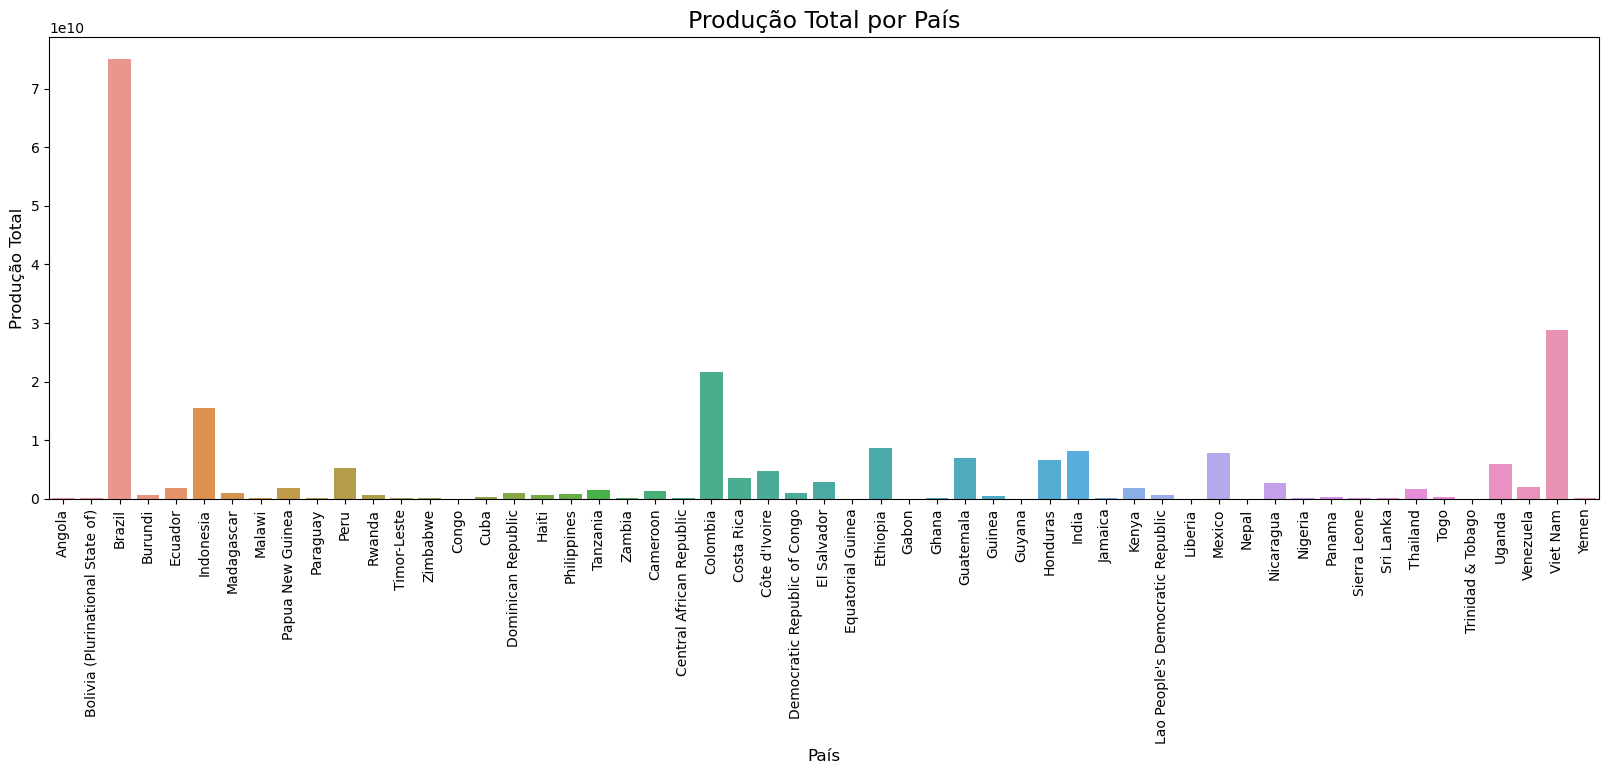

In [33]:
# Barplot
fig, ax = plt.subplots(figsize=(20,6))
ax = sns.barplot(data=producao, x='Country', y='Total_production')
plt.xticks(rotation=90)
ax.set_title('Produção Total por País', fontsize=17)
plt.xlabel('País', fontsize=12)
plt.ylabel('Produção Total', fontsize=12)

Top 20 produtores
0               Brazil
1             Viet Nam
2             Colombia
3            Indonesia
4             Ethiopia
5                India
6               Mexico
7            Guatemala
8             Honduras
9               Uganda
10                Peru
11       Côte d'Ivoire
12          Costa Rica
13         El Salvador
14           Nicaragua
15           Venezuela
16             Ecuador
17    Papua New Guinea
18               Kenya
19            Thailand
Name: Country, dtype: object


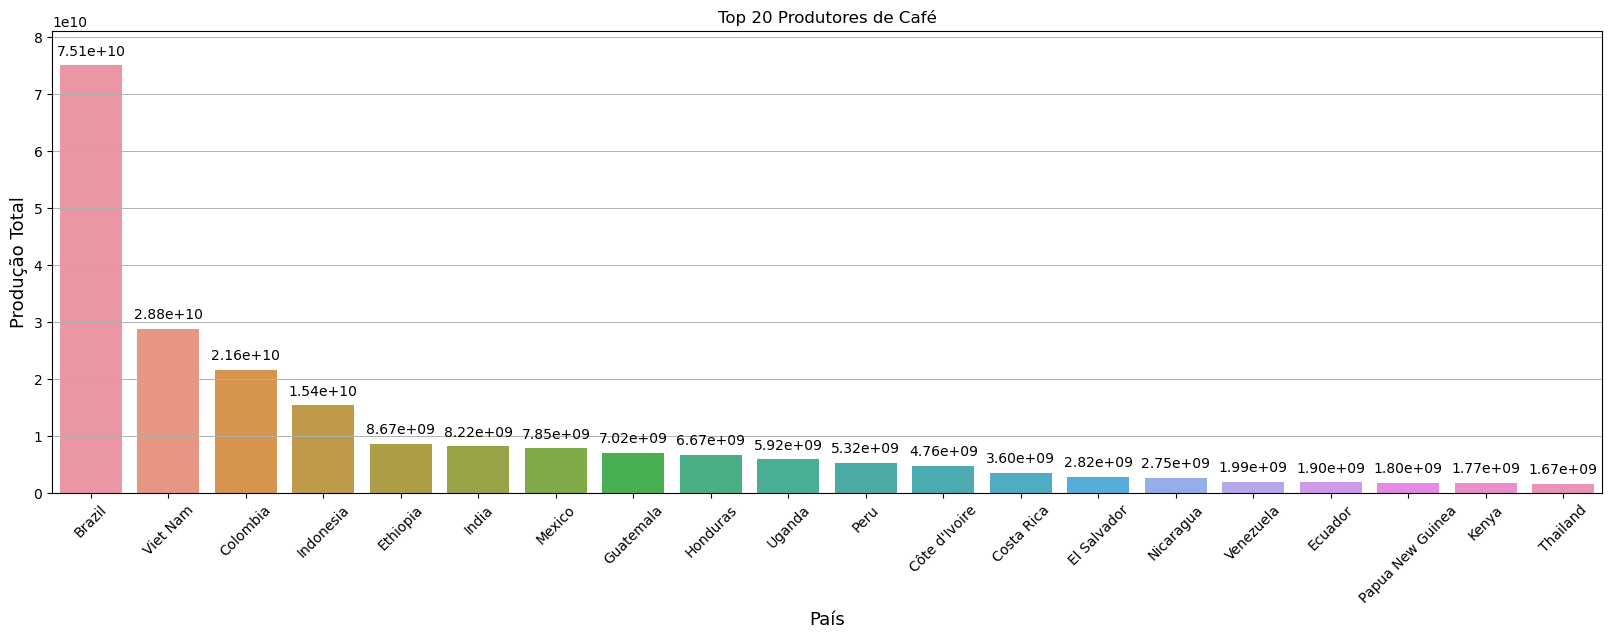

In [50]:
# Mesmo gráfico só que com os 20 maiores produtores
# Series com os 20 maiores produtores em ordem decrescente
top_20_produtores = producao.sort_values('Total_production', ascending=False)['Country'].drop_duplicates().head(20)
print('Top 20 produtores')
print(top_20_produtores.reset_index(drop=True))

fig, ax = plt.subplots(figsize=(20,6))
ax = sns.barplot(data=producao, x=top_20_produtores, y='Total_production')
plt.xticks(rotation=45)
plt.grid(True, which='both', axis='y', linestyle='-', linewidth=0.7)
ax.set_title('Top 20 Produtores de Café')
plt.xlabel('País', fontsize=13)
plt.ylabel('Produção Total', fontsize=13)


# Ajustar os limites do eixo y
max_value = producao['Total_production'].max()
plt.ylim(0, max_value * 1.08)  # Aumenta o limite superior do eixo y em 8%

# Adicionar os valores no topo das barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2e'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()



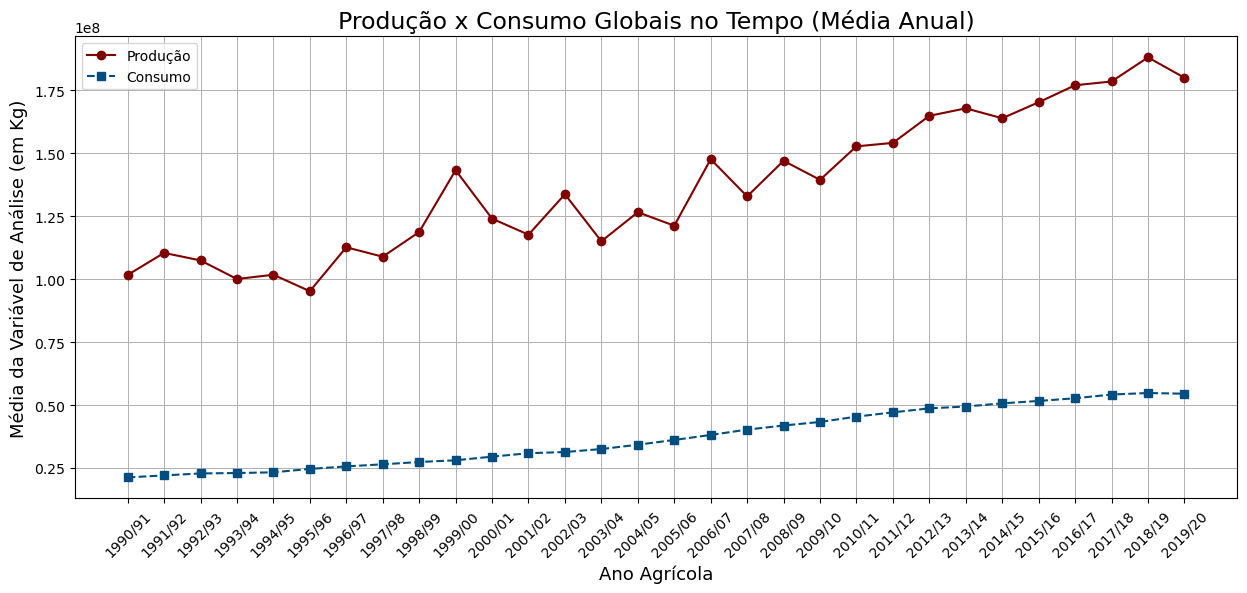

In [ ]:
## Gráfico de Evolução Global da Produção x Consumo

# Coleta dos dados
dados_producao = producao.loc[:, '1990/91':'2019/20']
dados_consumo = consumo_domestico.drop(columns='Coffee type').loc[:, '1990/91':'2019/20']
anos_labels = list(dados_producao.columns)

#Criação da Figura
fig, ax = plt.subplots(figsize=(15,6))


# Plot produção
plt.plot(anos_labels, dados_producao.mean(axis=0), label='Produção', marker='o', linestyle='-', color='#800000')
# Plot consumo
plt.plot(anos_labels, dados_consumo.mean(axis=0), label='Consumo', marker='s', linestyle='--', color="#004E80")
         
# Customização
plt.title('Produção x Consumo Globais no Tempo (Média Anual)', fontsize=17)
plt.xlabel('Ano Agrícola', fontsize=13)
plt.ylabel('Média da Variável de Análise (em Kg)', fontsize=13)
plt.xticks(rotation=45)
plt.grid(True, which='both', axis='both', linestyle='-', linewidth=0.7)
plt.legend(fontsize=10)

#### Quais países estão em comum entre os maiores produtores e os maiores consumidores?

In [12]:
print('Top 20 produtores')
print(top_20_produtores.values)

print()

print('Top 20 Consumidores')
print(top_20_consumidores.values)

# Converter as listas para conjuntos (sets)
set_produtores = set(top_20_produtores)
set_consumidores = set(top_20_consumidores)

# Encontrar a interseção entre os conjuntos
paises_em_comum = set_produtores.intersection(set_consumidores)

# Mostrar os países em ambas as listas
print()
print("Países presentes tanto na lista de Top 20 produtores quanto na lista de Top 20 consumidores:")
print(list(paises_em_comum))



Top 20 produtores
['Brazil' 'Viet Nam' 'Colombia' 'Indonesia' 'Ethiopia' 'India' 'Mexico'
 'Guatemala' 'Honduras' 'Uganda' 'Peru' "Côte d'Ivoire" 'Costa Rica'
 'El Salvador' 'Nicaragua' 'Venezuela' 'Ecuador' 'Papua New Guinea'
 'Kenya' 'Thailand']

Top 20 Consumidores
['Brazil' 'Indonesia' 'Ethiopia' 'Mexico' 'Philippines' 'Colombia'
 'Venezuela' 'India' 'Viet Nam' 'Thailand' 'Costa Rica'
 'Dominican Republic' 'Haiti' 'Guatemala' 'Madagascar' 'Honduras'
 'El Salvador' "Côte d'Ivoire" 'Peru' 'Cuba']

Países presentes tanto na lista de Top 20 produtores quanto na lista de Top 20 consumidores:
['Thailand', 'Ethiopia', 'Mexico', 'Costa Rica', 'Guatemala', 'Honduras', 'El Salvador', 'Indonesia', "Côte d'Ivoire", 'Peru', 'Colombia', 'Brazil', 'Viet Nam', 'India', 'Venezuela']


### Respondendo a Pergunta

In [13]:
# Tabela com os dados dos países em comum na lista entre os 20 maiores produtores e os 20 maiores consumidores
paises_em_comum = list(paises_em_comum)
comum_consumidores = consumo_domestico[consumo_domestico['Country'].isin(paises_em_comum)]
comum_consumidores.drop('Coffee type', axis=1, inplace=True)
comum_produtores = producao[producao['Country'].isin(paises_em_comum)]

# Mescla dos DF's em um só
mescla_em_comum = pd.merge(comum_consumidores, comum_produtores, on='Country', how='inner', suffixes=('_consumo', '_producao'))
mescla_em_comum.drop(['Total_production', 'Total_domestic_consumption'], axis=1, inplace=True)
mescla_em_comum.head(20)

C:\Users\pedro_w4exlxo\AppData\Local\Temp\ipykernel_23560\1306257133.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comum_consumidores.drop('Coffee type', axis=1, inplace=True)


,Country,1990/91_consumo,1991/92_consumo,1992/93_consumo,1993/94_consumo,1994/95_consumo,1995/96_consumo,1996/97_consumo,1997/98_consumo,1998/99_consumo,...,2010/11_producao,2011/12_producao,2012/13_producao,2013/14_producao,2014/15_producao,2015/16_producao,2016/17_producao,2017/18_producao,2018/19_producao,2019/20_producao
0,Brazil,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,732000000,...,3.325680e+09,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09
1,Indonesia,74520000,76800000,79140000,81540000,84000000,86580000,89160000,91920000,94680000,...,5.477400e+08,4.133400e+08,7.842000e+08,7.740600e+08,6.567600e+08,7.551000e+08,6.924600e+08,6.511200e+08,5.770800e+08,6.859800e+08
2,Peru,11400000,11400000,12000000,12000000,12000000,12000000,12000000,12000000,12000000,...,2.441400e+08,3.223800e+08,2.670000e+08,2.463600e+08,1.729800e+08,1.982400e+08,2.533800e+08,2.567400e+08,2.557800e+08,2.301600e+08
3,Colombia,74100000,76140000,78180000,80340000,82500000,81540000,80580000,79680000,78720000,...,5.113800e+08,4.591800e+08,5.956200e+08,7.274400e+08,7.999800e+08,8.405400e+08,8.780400e+08,8.294400e+08,8.319600e+08,8.460000e+08
4,Costa Rica,22500000,22500000,22500000,22500000,22500000,22500000,22500000,22500000,22500000,...,9.684000e+07,1.098600e+08,1.093800e+08,9.312000e+07,8.850000e+07,8.640000e+07,8.232000e+07,9.366000e+07,8.562000e+07,8.832000e+07
5,Côte d'Ivoire,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,3000000,...,5.022000e+07,1.329600e+08,1.196400e+08,1.558800e+08,1.036800e+08,7.734000e+07,6.702000e+07,9.744000e+07,1.305000e+08,1.157400e+08
6,El Salvador,10800000,10800000,13800000,13800000,13800000,16200000,13800000,11500020,11500020,...,1.123800e+08,6.984000e+07,7.440000e+07,3.090000e+07,3.990000e+07,3.390000e+07,3.660000e+07,4.560000e+07,4.566000e+07,3.966000e+07
7,Ethiopia,72000000,75840000,79860000,84120000,88560000,93300000,98220000,103440000,108960000,...,3.336000e+08,3.390000e+08,3.679200e+08,3.745200e+08,3.829800e+08,3.909000e+08,4.285800e+08,4.408200e+08,4.506600e+08,4.405800e+08
8,Guatemala,18000000,18000000,18000000,18600000,18600000,18600000,18000000,18000000,18000000,...,2.370000e+08,2.310000e+08,2.257800e+08,1.913400e+08,1.986000e+08,2.046000e+08,2.210400e+08,2.240400e+08,2.404200e+08,2.163600e+08
9,Honduras,11289240,15426000,14400000,13800000,15180000,9660000,10075440,9660000,8280000,...,2.598600e+08,3.529200e+08,2.811600e+08,2.749800e+08,3.160800e+08,3.471600e+08,4.474200e+08,4.536000e+08,4.291800e+08,3.558600e+08


Thailand
Ethiopia
Mexico
Costa Rica
Guatemala
Honduras
El Salvador
Indonesia
Côte d'Ivoire
Peru
Colombia
Brazil
Viet Nam
India
Venezuela


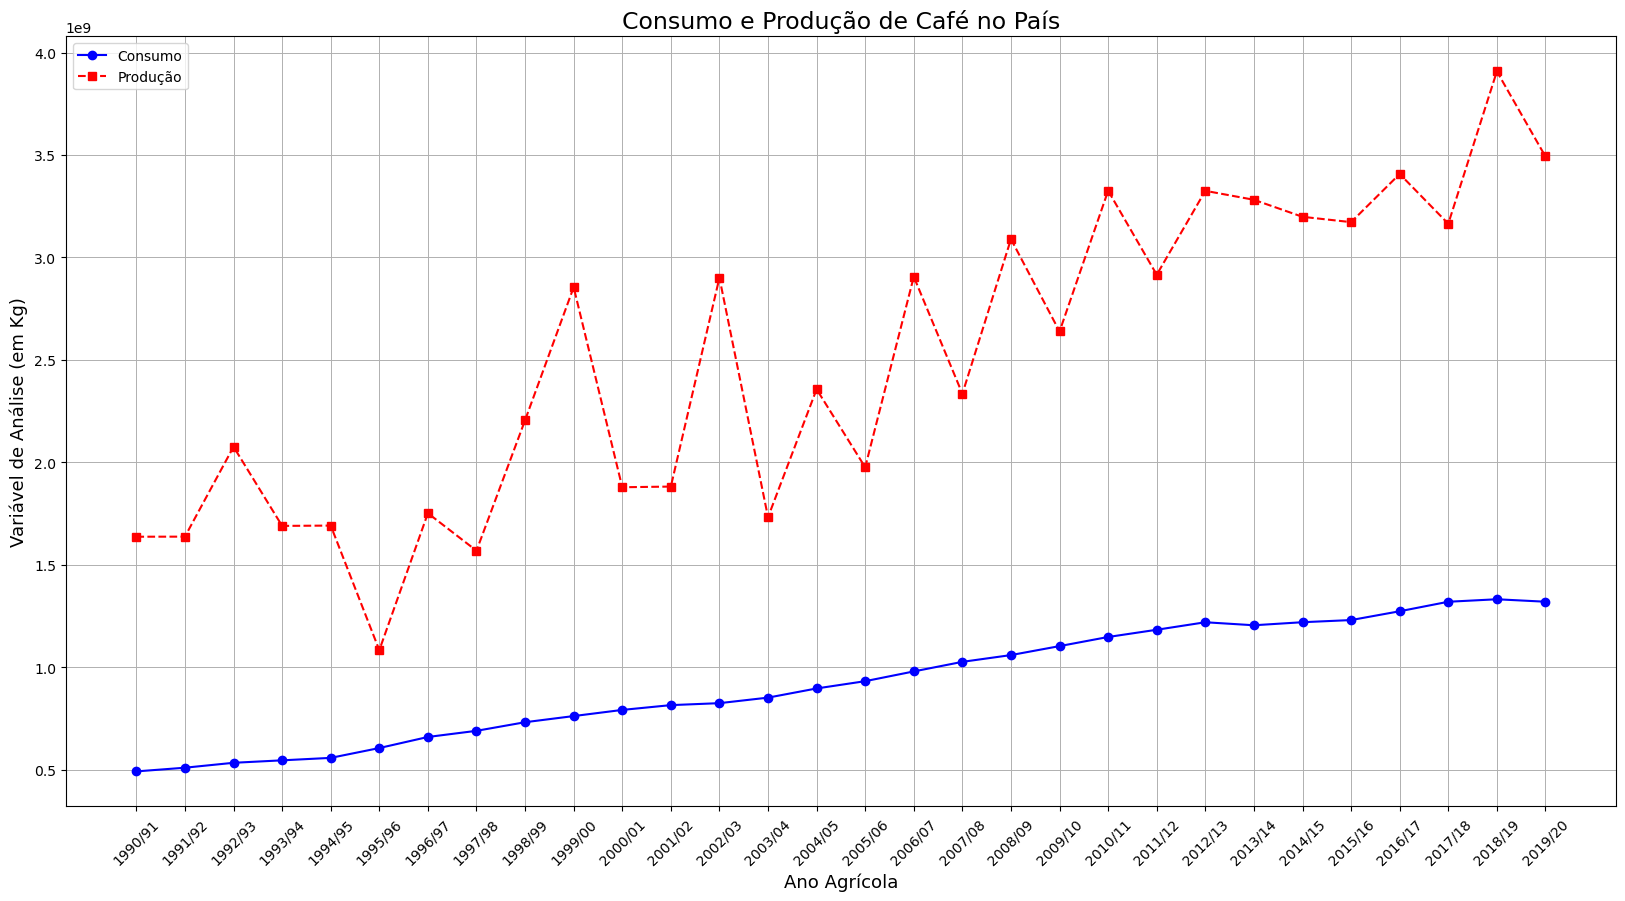

In [83]:
## Gráfico individual de evolução no país
# Qual país será analisado?
for pais in paises_em_comum:
    print(pais)
pais = "Brazil"

# Selecionando os dados para o país em cada DataFrame
consumo_pais = comum_consumidores[comum_consumidores['Country'] == pais].iloc[:, 1:-1]
producao_pais = comum_produtores[comum_produtores['Country'] == pais].iloc[:, 2:-1]

# Anos para o eixo x
anos = consumo_pais.columns

#Criação da Figura
fig, ax = plt.subplots(figsize=(20, 10))

# Plotando os dados de consumo
plt.plot(anos, consumo_pais.values[0], marker='o', linestyle='-', color='blue', label='Consumo')

# Plotando os dados de produção
plt.plot(anos, producao_pais.values[0], marker='s', linestyle='--', color='red', label='Produção')

# Configurações adicionais
plt.title('Consumo e Produção de Café no País', fontsize=17)
plt.xlabel('Ano Agrícola', fontsize=13)
plt.xticks(rotation=45)
plt.ylabel('Variável de Análise (em Kg)', fontsize=13)
plt.grid(True, which='both', axis='both', linestyle='-', linewidth=.7)
plt.legend(fontsize=10)

plt.show()

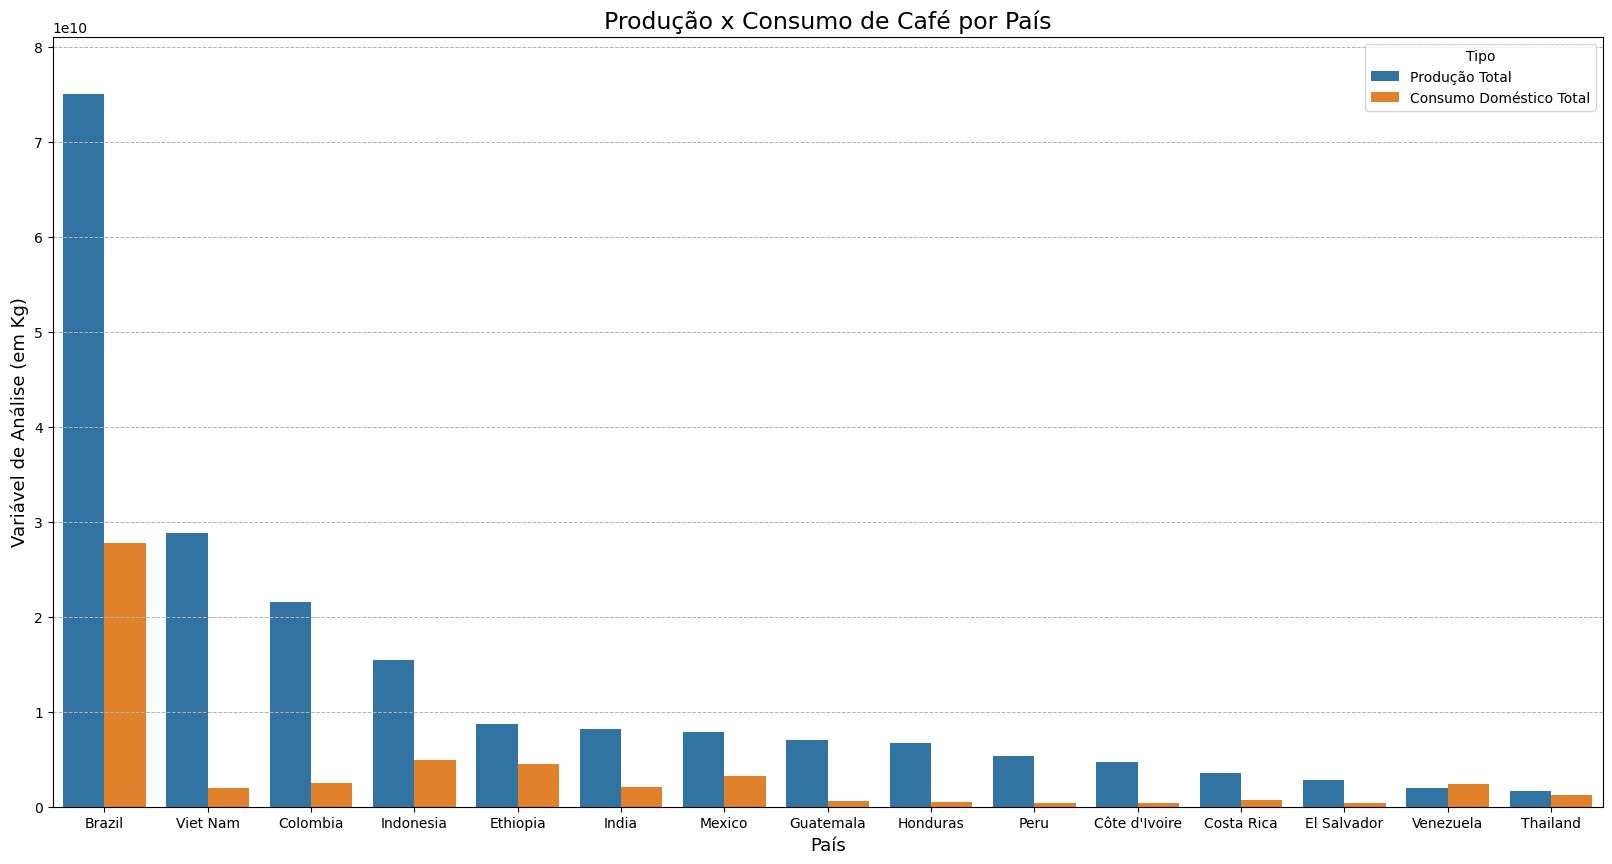

In [99]:
# Fundindo os DataFrames com base no país em comum
mescla_em_comum2 = pd.merge(comum_consumidores, comum_produtores, on='Country', how='inner', suffixes=('_consumo', '_producao'))

# Reformatando os dados para o formato correto
mescla_em_comum2_melted = pd.melt(mescla_em_comum2, id_vars=['Country'], 
                                  value_vars=['Total_production', 'Total_domestic_consumption'], 
                                  var_name='Tipo', value_name='Valor')

#Ordenar por maior produção
mescla_em_comum2_melted.sort_values('Valor', ascending=False, inplace=True)

# Plotando o gráfico de barras
plt.figure(figsize=(20, 10))
ax = sns.barplot(data=mescla_em_comum2_melted, x='Country', y='Valor', hue='Tipo')
plt.title('Produção x Consumo de Café por País', fontsize=17)
plt.xlabel('País', fontsize=13)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=.7)

# Alterar os rótulos das legendas
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Produção Total', 'Consumo Doméstico Total']  # Novos rótulos para as legendas
ax.legend(handles=handles, labels=new_labels, title='Tipo')

# Ajustar os limites do eixo y
max_value = mescla_em_comum2_melted['Valor'].max()
plt.ylim(0, max_value * 1.08)  # Aumenta o limite superior do eixo y em 8%

plt.show()

Por fim, a resposta para a questão é que SIM, há uma relação entre os países que mais produziram e os países que mais consumiram café entre 1990/91 e 2019/20, visto que entre os seus top 20 há 13 países em comum. No entanto, para afirmar a relação direta entre consumo e produção de café, faz-se necessária uma análise correlacional, se possível englobando outros fatores.